In [29]:
import pandas as pd
import ast

# Load the data
file_path = 'results_temp/comparison_ps_200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', None)
for i in data["non_dominated"]:
    print(len(ast.literal_eval(i)), i)
data


1 [16]
35 [0, 1, 2, 3, 5, 6, 8, 9, 11, 13, 15, 16, 17, 20, 21, 22, 23, 24, 26, 27, 29, 30, 33, 34, 35, 36, 37, 38, 40, 43, 44, 46, 47, 48, 49]
36 [0, 1, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 36, 37, 38, 40, 42, 44, 46, 47, 48, 49]
36 [0, 1, 5, 6, 8, 9, 11, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 40, 42, 44, 46, 47, 48, 49]
41 [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
46 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
49 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
49 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13

,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,PolicyScreeningEpsGreedy,non_dominated
0,176.701891,179.430090,78.830179,11,231.054131,98.018741,[16]
1,176.995222,76.394363,155.408742,39,233.928166,182.280811,"[0, 1, 2, 3, 5, 6, 8, 9, 11, 13, 15, 16, 17, 2..."
2,258.327888,155.064229,103.361028,3,203.896648,103.320078,"[0, 1, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 16, 2..."
3,146.938622,122.333420,122.521689,3,203.888979,173.987866,"[0, 1, 5, 6, 8, 9, 11, 13, 14, 15, 16, 19, 20,..."
4,149.776566,157.708809,106.012991,18,182.576667,155.393701,"[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 1..."
5,182.189227,182.282999,155.118946,7,155.329348,155.329348,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,149.888793,174.441538,127.785066,23,258.588849,258.409303,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,174.047039,130.477528,155.142914,3,258.446583,130.487929,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,206.841148,206.590123,157.686410,3,176.754415,125.124498,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,128.270561,100.576678,122.323724,3,234.058986,176.797993,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [30]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'eps_greedy_policy', 'optimal_policy']:
        data[f'regret_{column}'] = data['optimal_outcome_actions'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


TypeError: unsupported operand type(s) for -: 'float' and 'str'

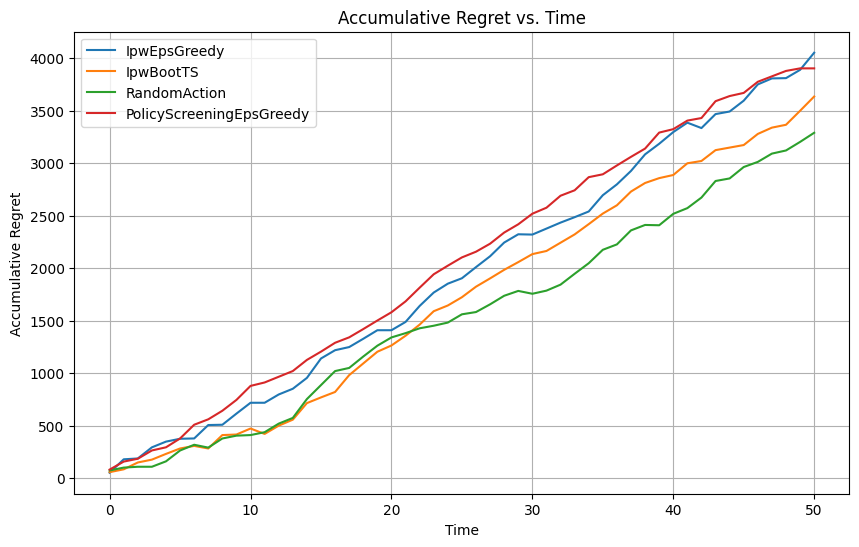

In [ ]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret vs. Time')
ax.legend()

plt.grid(True)
plt.show()


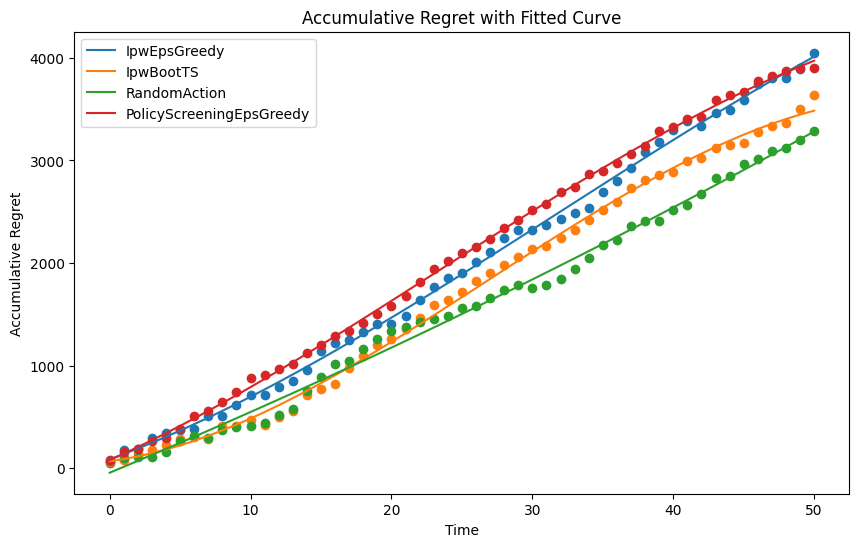

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
